In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from utils.models import Model_N0, Model_T0, My_Dataset
from utils.validation import *

Noise_data1 = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_MaxFM/noiseSPL_2.csv"
Noise_data0 = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_initial/noiseSPL_1.csv"
Noise_data2 = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_balence/noiseSPL_4.csv"
Noise_data3 = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_MinN/noiseSPL_3.csv"
head_Noise = ("Angle","Frequency1","SPL1","SPL_Broad1","Frequency2","SPL2","SPL_Broad2","OASPL")

T_data0 = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_initial/rotorhover_MidHigh_initial_convergence1.csv"
T_data1 = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_MaxFM/rotorhover_MidHigh_MaxFM_convergence2.csv"
T_data2 = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_MinN/rotorhover_MidHigh_MinN_convergence3.csv"
T_data3 = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_balence/rotorhover_MidHigh_balence_convergence4.csv"
head_T  = ("ref age (deg)","T","DT","RPM_1","CT_1","CQ_1","eta_1")

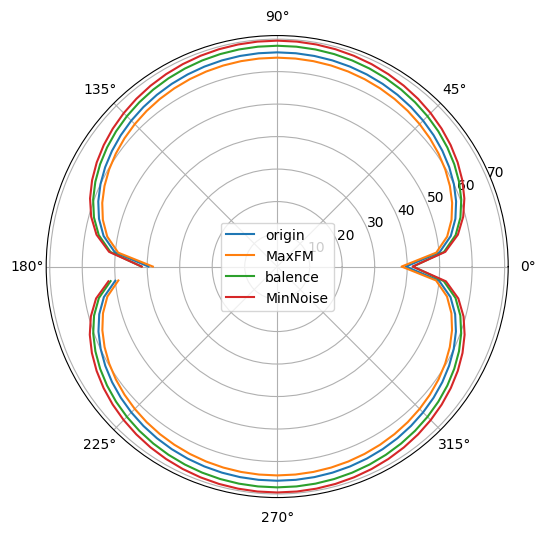

inital Noise: 61.3046
max Noise: 59.8582
min Noise: 63.1737
balence Noise: 64.4282


In [3]:
df_N = pd.read_csv(Noise_data0)

x0,y0 = df_N[head_Noise[0]].to_numpy()*np.pi/180,df_N[head_Noise[7]].to_numpy()

df_N = pd.read_csv(Noise_data1)

x1,y1 = df_N[head_Noise[0]].to_numpy()*np.pi/180,df_N[head_Noise[7]].to_numpy()

df_N = pd.read_csv(Noise_data2)

x2,y2 = df_N[head_Noise[0]].to_numpy()*np.pi/180,df_N[head_Noise[7]].to_numpy()

df_N = pd.read_csv(Noise_data3)

x3,y3 = df_N[head_Noise[0]].to_numpy()*np.pi/180,df_N[head_Noise[7]].to_numpy()

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='polar')  # 创建极坐标子图
ax.plot(x0,y0,label="origin")  # 绘制极坐标图
ax.plot(x1,y1,label="MaxFM")  # 绘制极坐标图
ax.plot(x2,y2,label="balence")  # 绘制极坐标图
ax.plot(x3,y3,label="MinNoise")  # 绘制极坐标图
plt.legend()
plt.show()

print("inital Noise: {:.4f}".format(np.mean(y0)))
print("max Noise: {:.4f}".format(np.mean(y1)))
print("min Noise: {:.4f}".format(np.mean(y2)))
print("balence Noise: {:.4f}".format(np.mean(y3)))

In [4]:
rho  = 1.071778 
d    = 0.12 * 2
n    = 90

a = rho * n**2 * d**4
b = rho * n**2 * d**5
c1 = 2 * np.pi * 90
c2 = np.sqrt(2 * np.pi * 0.12**2 * rho)
c3 = np.sqrt(2 * rho * np.pi * 0.12**2) * 90 * 2 * np.pi
st = int(720*0.6)
ed = int(720*0.8)

def get_meanFM(Name):
    df_T  = pd.read_csv(Name)
    t,CT,CQ = df_T[head_T[0]].to_numpy(),df_T[head_T[4]].to_numpy(),df_T[head_T[5]].to_numpy()
    T   = CT * a
    Q   = CQ * b
    P   = Q * c1
    FM  = T**1.5 / P /c2
    mean_FM = np.mean(FM[st:ed])
    return mean_FM

inital_FM = get_meanFM(T_data0)
max_FM = get_meanFM(T_data1)
min_FM = get_meanFM(T_data2)
balence = get_meanFM(T_data3)
print("inital FM: {:.4f}".format(inital_FM))
print("max FM: {:.4f}".format(max_FM))
print("min FM: {:.4f}".format(min_FM))
print("balence FM: {:.4f}".format(balence))


inital FM: 0.6132
max FM: 0.6394
min FM: 0.5944
balence FM: 0.6239


inital Noise: 63.1737
balence: 59.8582
New Max Noise: 62.5113
New Min Noise: 59.5632
inital FM: 0.5944
balence FM: 0.6394
New MaxFM: 0.6614
New MinFM: 0.5788


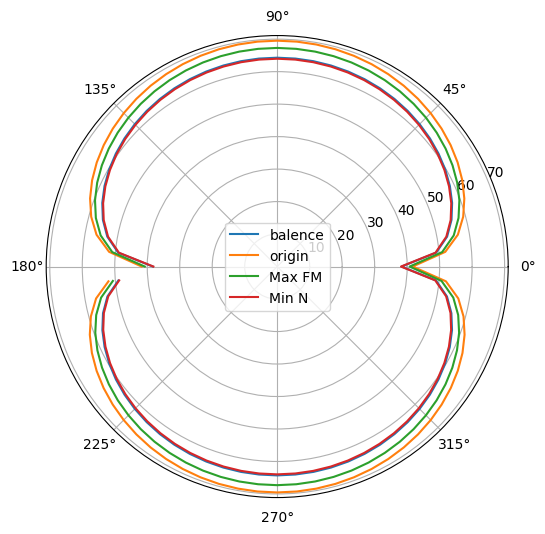

In [5]:
New_noisedata1 = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_MaxFM_New1/noiseSPL_2.csv"
New_Tdata1     = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_MaxFM_New1/rotorhover_MidHigh_MaxFM_New1_convergence2.csv"
New_noisedata2 = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_MinN_new1/noiseSPL_1.csv"
New_Tdata2     = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_MinN_new1/rotorhover_MidHigh_MinN_new1_convergence1.csv"

df_N = pd.read_csv(New_noisedata1)
New_x0,New_y0 = df_N[head_Noise[0]].to_numpy()*np.pi/180,df_N[head_Noise[7]].to_numpy()

df_N = pd.read_csv(New_noisedata2)
New_x1,New_y1 = df_N[head_Noise[0]].to_numpy()*np.pi/180,df_N[head_Noise[7]].to_numpy()

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='polar')  # 创建极坐标子图
ax.plot(x1,y1,label="balence")  # 绘制极坐标图
ax.plot(x3,y3,label="origin")  # 绘制极坐标图
ax.plot(New_x0,New_y0,label="Max FM")  # 绘制极坐标图
ax.plot(New_x1,New_y1,label="Min N")  # 绘制极坐标图
plt.legend()


print("inital Noise: {:.4f}".format(np.mean(y2)))
print("balence: {:.4f}".format(np.mean(y1)))
print("New Max Noise: {:.4f}".format(np.mean(New_y0)))
print("New Min Noise: {:.4f}".format(np.mean(New_y1)))
new_FM1 = get_meanFM(New_Tdata1)
new_FM2 = get_meanFM(New_Tdata2)

print("inital FM: {:.4f}".format(min_FM))
print("balence FM: {:.4f}".format(max_FM))
print("New MaxFM: {:.4f}".format(new_FM1))
print("New MinFM: {:.4f}".format(new_FM2))

plt.savefig("contast_result.pdf")
plt.show()

initial: rotorhover_MidHigh_MinN

balence: rotorhover_MidHigh_MaxFM

best noise: min_N new1

best FM: maxFM new1



In [6]:
import re
def parse_float_array(s):
    # 使用字符串的replace方法去除不需要的字符
    clean_str = s.replace('[', '').replace(']', '').replace('\n', '')
    # 基于空格将字符串分割为数组，并转换为浮点数
    return [float(item) for item in clean_str.split()]

path_result0 = "Opmized_ChordPitch.csv"
path_result1 = "Optimized_ChordPitch_New1.csv"
head_geom = ("r/R(chord)","c/R","r/R(pitch)","twist (deg)")

df_geom0 = pd.read_csv(path_result0)
df_geom1 = pd.read_csv(path_result1)

origin_geom = df_geom0.iloc[3]
balence_geom = df_geom0.iloc[1]
MaxFM_geom = df_geom1.iloc[1]
MinN_geom = df_geom1.iloc[0]

chord_x0 = parse_float_array(origin_geom[head_geom[0]])
chord_y0 = parse_float_array(origin_geom[head_geom[1]])
pitch_x0 = parse_float_array(origin_geom[head_geom[2]])
pitch_y0 = parse_float_array(origin_geom[head_geom[3]])

chord_x1 = parse_float_array(balence_geom[head_geom[0]])
chord_y1 = parse_float_array(balence_geom[head_geom[1]])
pitch_x1 = parse_float_array(balence_geom[head_geom[2]])
pitch_y1 = parse_float_array(balence_geom[head_geom[3]])

chord_x2 = parse_float_array(MaxFM_geom[head_geom[0]])
chord_y2 = parse_float_array(MaxFM_geom[head_geom[1]])
pitch_x2 = parse_float_array(MaxFM_geom[head_geom[2]])
pitch_y2 = parse_float_array(MaxFM_geom[head_geom[3]])

chord_x3 = parse_float_array(MinN_geom[head_geom[0]])
chord_y3 = parse_float_array(MinN_geom[head_geom[1]])
pitch_x3 = parse_float_array(MinN_geom[head_geom[2]])
pitch_y3 = parse_float_array(MinN_geom[head_geom[3]])


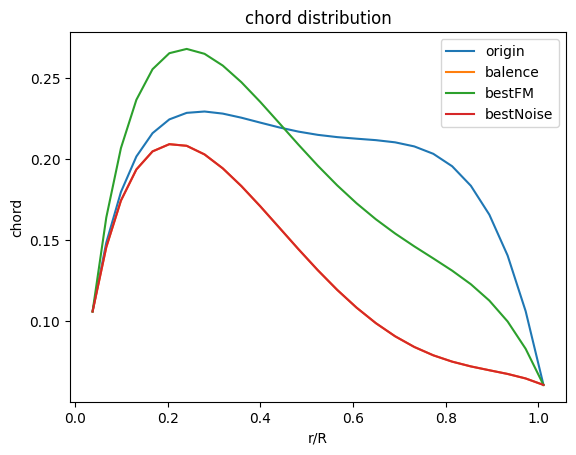

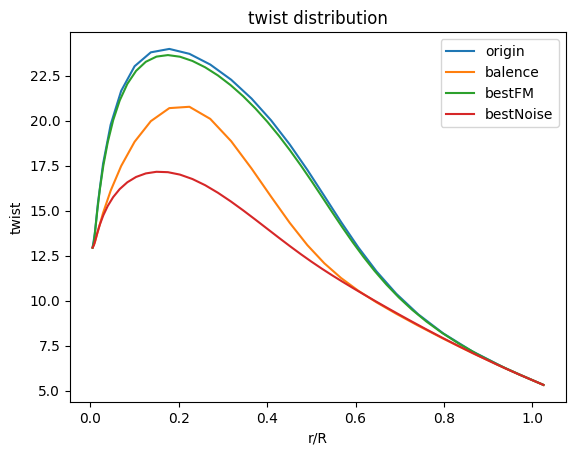

In [7]:

import matplotlib.pyplot as plt
plt.plot(chord_x0, chord_y0,label = "origin")
plt.plot(chord_x1,chord_y1,label = "balence")
plt.plot(chord_x2,chord_y2,label = "bestFM")
plt.plot(chord_x3,chord_y3,label = "bestNoise")
plt.legend()
plt.ylabel("chord")
plt.xlabel("r/R")
plt.title("chord distribution")
plt.savefig("contrast_chord.pdf")
plt.show()


plt.plot(pitch_x0, pitch_y0,label = "origin")
plt.plot(pitch_x1,pitch_y1,label = "balence")
plt.plot(pitch_x2,pitch_y2,label = "bestFM")
plt.plot(pitch_x3,pitch_y3,label = "bestNoise")
plt.legend()
plt.ylabel("twist")
plt.xlabel("r/R")
plt.title("twist distribution")
plt.savefig("contrast_twist.pdf")
plt.show()

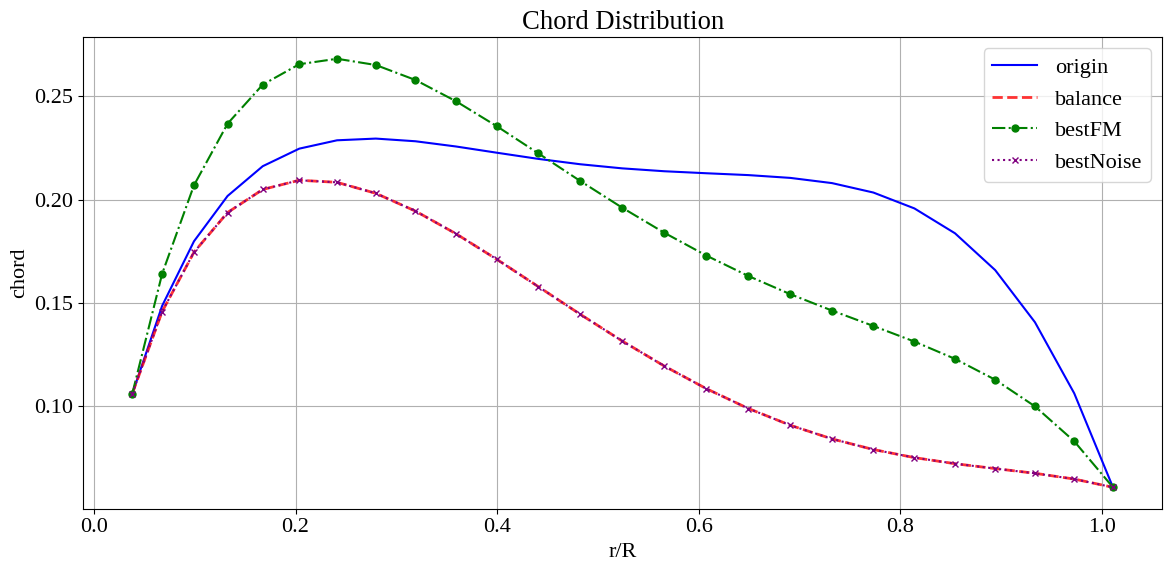

In [8]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Liberation Serif'
plt.rcParams['font.size'] = 16  # 可以调整这个值来设置字体大小

plt.figure(figsize=(12, 6))

# 绘制线条，并为每条线设置不同的样式
plt.plot(chord_x0, chord_y0, label="origin", linestyle='-', color='blue')
plt.plot(chord_x1, chord_y1, label="balance", linestyle='--', color='red', linewidth=2, alpha=0.8)
plt.plot(chord_x2, chord_y2, label="bestFM", linestyle='-.', color='green', marker='o', markersize=5)
plt.plot(chord_x3, chord_y3, label="bestNoise", linestyle=':', color='purple', marker='x', markersize=5)

plt.legend(loc='upper right')
plt.ylabel("chord")
plt.xlabel("r/R")
plt.title("Chord Distribution")
plt.grid(True)
plt.tight_layout()

plt.savefig("contrast_chord.pdf")
plt.show()

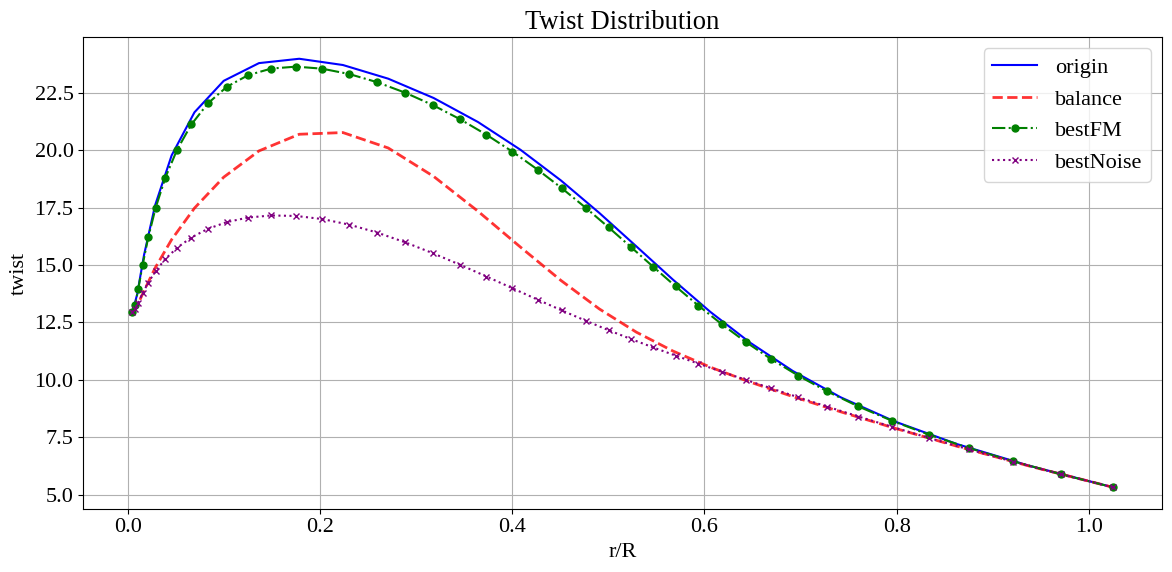

In [9]:

plt.figure(figsize=(12, 6))

# 绘制线条，并为每条线设置不同的样式
plt.plot(pitch_x0, pitch_y0, label="origin", linestyle='-', color='blue')
plt.plot(pitch_x1, pitch_y1, label="balance", linestyle='--', color='red', linewidth=2, alpha=0.8)
plt.plot(pitch_x2, pitch_y2, label="bestFM", linestyle='-.', color='green', marker='o', markersize=5)
plt.plot(pitch_x3, pitch_y3, label="bestNoise", linestyle=':', color='purple', marker='x', markersize=5)

plt.legend(loc='upper right')
plt.ylabel("twist")
plt.xlabel("r/R")
plt.title("Twist Distribution")
plt.grid(True)
plt.tight_layout()

plt.savefig("contrast_twist.pdf")
plt.show()

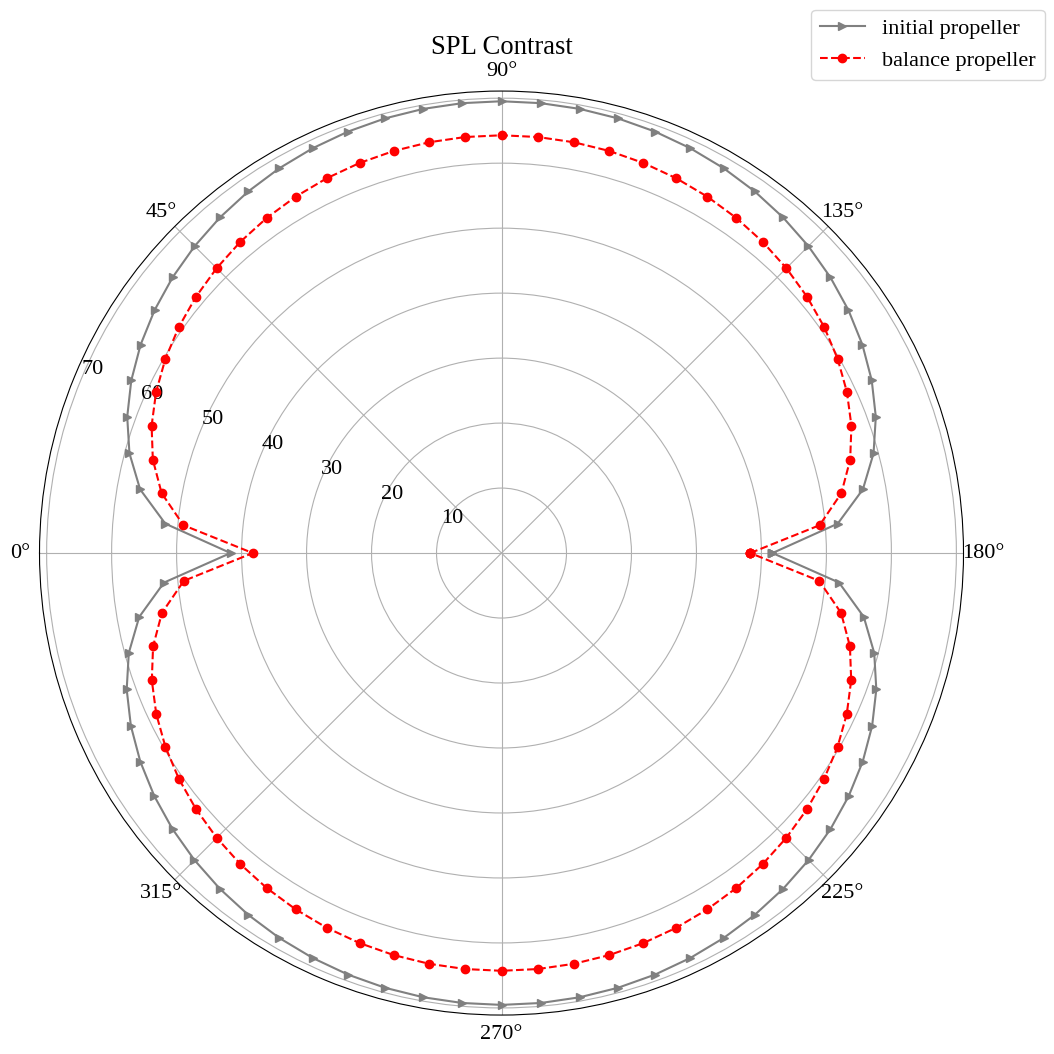

In [12]:
New_noisedata1 = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_MaxFM_New1/noiseSPL_2.csv"
New_Tdata1     = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_MaxFM_New1/rotorhover_MidHigh_MaxFM_New1_convergence2.csv"
New_noisedata2 = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_MinN_new1/noiseSPL_1.csv"
New_Tdata2     = "/home/sh/WCY/auto_propeller/resource5/3_validation/rotorhover_MidHigh_MinN_new1/rotorhover_MidHigh_MinN_new1_convergence1.csv"

df_N = pd.read_csv(New_noisedata1)
New_x0,New_y0 = df_N[head_Noise[0]].to_numpy()*np.pi/180,df_N[head_Noise[7]].to_numpy()

df_N = pd.read_csv(New_noisedata2)
New_x1,New_y1 = df_N[head_Noise[0]].to_numpy()*np.pi/180,df_N[head_Noise[7]].to_numpy()
x1 = np.append(x1, x1[0])
y1 = np.append(y1, y1[0])
x3 = np.append(x3, x3[0])
y3 = np.append(y3, y3[0])
New_x0 = np.append(New_x0, New_x0[0])
New_y0 = np.append(New_y0, New_y0[0])
New_x1 = np.append(New_x1, New_x1[0])
New_y1 = np.append(New_y1, New_y1[0])

plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection='polar')

# 绘制极坐标图
ax.plot(x3, y3, marker = ">",label="initial propeller", linestyle='-', color='grey')
ax.plot(x1, y1, marker = "o", label="balance propeller", linestyle='--', color='red')

# ax.plot(New_x0, New_y0, label="bestFM", linestyle='-.', color='green')
# ax.plot(New_x1, New_y1, label="bestN", linestyle=':', color='purple')

# 设置图例位置
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# 设置标题
plt.title("SPL Contrast")

# 调整刻度和标签设置
ax.set_theta_zero_location('W')  # 设置0度在顶部
ax.set_theta_direction(-1)  # 设置角度顺时针增加

plt.savefig("contrast SPL.pdf")
plt.show()